In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [6]:
df = pd.read_csv('train_data.csv')
df.head()
df.dtypes

case_id                                int64
Hospital_code                          int64
Hospital_type_code                    object
City_Code_Hospital                     int64
Hospital_region_code                  object
Available Extra Rooms in Hospital      int64
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed Grade                            float64
patientid                              int64
City_Code_Patient                    float64
Type of Admission                     object
Severity of Illness                   object
Visitors with Patient                  int64
Age                                   object
Admission_Deposit                    float64
Stay                                  object
dtype: object

In [8]:
df2 = df[['Age', 'Stay']]
df2.head()
df2.dropna()

,Age,Stay
0,51-60,0-10
1,51-60,41-50
2,51-60,31-40
3,51-60,41-50
4,51-60,41-50
...,...,...
318433,41-50,11-20
318434,81-90,31-40
318435,71-80,11-20
318436,11-20,11-20


/opt/anaconda3/envs/clinternship/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


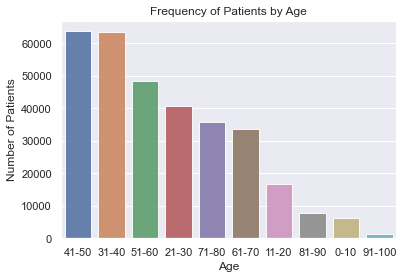

In [10]:
%matplotlib inline
patient_count = df2['Age'].value_counts()
sns.set(style = 'darkgrid' )
sns.barplot(patient_count.index, patient_count.values, alpha = 0.9)
plt.title('Frequency of Patients by Age')
plt.ylabel('Number of Patients', fontsize=12)
plt.xlabel('Age', fontsize=12)
plt.show()

/opt/anaconda3/envs/clinternship/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


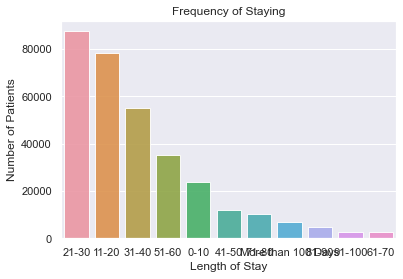

In [11]:
%matplotlib inline
durations_count = df2['Stay'].value_counts()
sns.set(style = 'darkgrid' )
sns.barplot(durations_count.index, durations_count.values, alpha = 0.9)
plt.title('Frequency of Staying')
plt.ylabel('Number of Patients', fontsize=12)
plt.xlabel('Length of Stay', fontsize=12)
plt.show()

In [12]:
#Essentially separates out the 51 and 60 when you do 51-60
dummy_df_age = pd.DataFrame({'age': df['Age']})
dummy_df_age['start'], dummy_df_age['end'] = zip(*dummy_df_age['age'].map(lambda x: x.split('-')))
dummy_df_age.head()

#Finds the mean of the age range so that you can have a numerical representation graph later on
#51-60 would yield 55.5 since it is the middle number of 51 and 60
def split_mean(x):
    split_list = x.split('-')
    mean = (float(split_list[0]) + float(split_list[1])) / 2
    return mean

dummy_df_age['age_mean'] = dummy_df_age['age'].apply(lambda x: split_mean(x))
dummy_df_age.head()

,age,start,end,age_mean
0,51-60,51,60,55.5
1,51-60,51,60,55.5
2,51-60,51,60,55.5
3,51-60,51,60,55.5
4,51-60,51,60,55.5


In [13]:
#Finding the average time spent at the hospital 
df3 = dummy_df_age[['age_mean']]
df3.describe()

,age_mean
count,318438.000000
mean,46.767949
std,18.917238
min,5.000000
25%,35.500000
50%,45.500000
75%,55.500000
max,95.500000


In [31]:
dummy_df_stay = pd.DataFrame({'stay': df['Stay']})
dummy_df_stay.head()
dummy_df_stay['starts'], dummy_df_stay['ends'] = zip(*dummy_df_stay['stay'].map(lambda x: x.split('-')))

ValueError: not enough values to unpack (expected 2, got 1)

<AxesSubplot:>

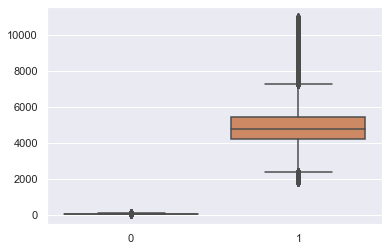

In [30]:
new_df = [dummy_df_age['age_mean'], df['Admission_Deposit']]
sns.boxplot(data=new_df)